<a href="https://colab.research.google.com/github/zjc664656505/My-Data-Science-Projects/blob/master/%E2%80%9CML_Hackathon_YelpNYC_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


## Part1: Data Preprocessing (Don't implement this part. It's already done.)

In [ ]:
"""
In this part, I will read the data files from the share task, 
and I will save them into the our shared Google data folder.
"""

#Read metadata
metadata = pd.read_csv("/content/drive/MyDrive/YelpNYC/metadata.txt", delimiter = "\t", names = ["usr_id", "prod_id", "prod_rating", "review_label", "rating_date"])

In [ ]:
metadata

,usr_id,prod_id,prod_rating,review_label,rating_date
0,923,0,3.0,-1,2014-12-08
1,924,0,3.0,-1,2013-05-16
2,925,0,4.0,-1,2013-07-01
3,926,0,4.0,-1,2011-07-28
4,927,0,4.0,-1,2010-11-01
...,...,...,...,...,...
359047,161146,349,5.0,1,2014-02-06
359048,116424,349,5.0,1,2014-01-31
359049,161147,349,5.0,1,2014-01-30
359050,97930,349,5.0,1,2014-01-25


In [ ]:
#read review content
review_content = pd.read_csv("/content/drive/MyDrive/YelpNYC/reviewContent.txt", delimiter= "\t", names = ["usr_id", "prod_id", "rating_date", "text"])

In [ ]:
review_content

,usr_id,prod_id,rating_date,text
0,923,0,2014-12-08,The food at snack is a selection of popular Gr...
1,924,0,2013-05-16,This little place in Soho is wonderful. I had ...
2,925,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,926,0,2011-07-28,This is a beautiful quaint little restaurant o...
4,927,0,2010-11-01,Snack is great place for a casual sit down lu...
...,...,...,...,...
358952,161146,349,2014-02-06,"I'm very spoiled with Pizza. Really, I have tr..."
358953,116424,349,2014-01-31,Can't say enough good things about this place....
358954,161147,349,2014-01-30,"Had a great dinner here- fantastic pizza, the ..."
358955,97930,349,2014-01-25,"Great foods and great drinks, they have even p..."


In [ ]:
#read review_graph
review_graph = pd.read_csv("/content/drive/MyDrive/YelpNYC/reviewGraph.txt", delimiter= "\t", names = ["usr_id", "review_label", "prod_rating"])

In [ ]:
review_graph

,usr_id,review_label,prod_rating
0,923,0,3.0
1,924,0,3.0
2,925,0,4.0
3,926,0,4.0
4,927,0,4.0
...,...,...,...
359047,161146,349,5.0
359048,116424,349,5.0
359049,161147,349,5.0
359050,97930,349,5.0


In [ ]:
#read usr_id_map
usr_id_map = pd.read_csv("/content/drive/MyDrive/YelpNYC/userIdMapping.txt", delimiter="\t", names = ["usr_name", "usr_id"])

In [ ]:
usr_id_map

,usr_name,usr_id
0,uop97wmeahYhnWSsHhGmHA,100752
1,i1s4QHRS5zZtZqPrTmutSA,31510
2,sd00TiP5ENkm6rKYPn3p3A,53651
3,ERxDm_rNNmgl40hfC78_7g,48047
4,FBjIChlJ437HqVe134bCVw,13449
...,...,...
160220,RcMeGE0ink7hczwwpmvxDA,147638
160221,9bNIVxC4CxbLgDk2k_tP4g,31726
160222,wpBhT1F15xTbnOcYK6Tb7w,73829
160223,nyKwYsXyg2OTmfH408LzRQ,141950


In [ ]:
#read prod_id_map
prod_id_map = pd.read_csv("/content/drive/MyDrive/YelpNYC/productIdMapping.txt", delimiter="\t", names = ["prod_name", "prod_id"])

In [ ]:
prod_id_map

,prod_name,prod_id
0,Snack,0
1,Peppino’s,1
2,Dekalb Restaurant,3
3,Le Parisien,4
4,Blue Spoon Coffee,5
...,...,...
918,Beyoglu,917
919,Benares,902
920,BrisketTown,920
921,Bijan’s,921


In [ ]:
# Data join to a large dataframe which contains everything
final_data = metadata.merge(usr_id_map, 
                            how = "inner",
                            on = "usr_id")
final_data = final_data.merge(prod_id_map,
                              how = "inner",
                              on = "prod_id")
final_data = final_data.merge(review_content,
                              how = "inner",
                              on = ["usr_id", "prod_id", "rating_date"])

In [ ]:
final_data

In [ ]:
final_data.to_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv", index = False)

## Part2: Dataset Analysis

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

In [ ]:
combined_data.head(100)

,usr_id,prod_id,prod_rating,review_label,rating_date,usr_name,prod_name,text
0,923,0,3.0,-1,2014-12-08,tKqGsSTxNw73ew83HayaHg,Snack,The food at snack is a selection of popular Gr...
1,924,0,3.0,-1,2013-05-16,tDkQYBMmXJV9h47AHpRsFQ,Snack,This little place in Soho is wonderful. I had ...
2,925,0,4.0,-1,2013-07-01,6eEE_9VB6Xv8i3p5vnZuNA,Snack,ordered lunch for 15 from Snack last Friday. ...
3,926,0,4.0,-1,2011-07-28,BrkRsgGWjVuBRKPaWfEVhg,Snack,This is a beautiful quaint little restaurant o...
4,927,0,4.0,-1,2010-11-01,k76ERN3bn6dQk_Kxf9M9Zg,Snack,Snack is great place for a casual sit down lu...
...,...,...,...,...,...,...,...,...
95,1018,0,4.0,1,2011-01-02,4tg3dtpN2avjfhcYC4hAlA,Snack,"Snack is a simple, tiny little restaurant tuck..."
96,1019,0,5.0,1,2010-12-31,8RCcx6A6vQ3hTksLcUAYhg,Snack,"snacks, to me, are tasty little tidbits of hap..."
97,1020,0,2.0,1,2010-11-15,eM1P0URJtBXhCb_gat660g,Snack,Hmmm soso.... I can't much about it other than...
98,1021,0,4.0,1,2010-11-11,Sr7DGLkvxkKcuyyL_Jav8w,Snack,"Snack is simple, but good - like its name! The..."


In [ ]:
# Get holistic view on the dataset information
combined_data.describe()

,usr_id,prod_id,prod_rating,review_label
count,358957.000000,358957.000000,358957.000000,358957.000000
mean,53997.215187,459.989378,4.025861,0.794627
std,45808.754776,259.913081,1.055113,0.607099
min,923.000000,0.000000,1.000000,-1.000000
25%,13840.000000,247.000000,4.000000,1.000000
50%,40532.000000,468.000000,4.000000,1.000000
75%,87321.000000,672.000000,5.000000,1.000000
max,161147.000000,922.000000,5.000000,1.000000


In [ ]:
# Split dataframe based on the review_label
fake_review_df = combined_data.loc[combined_data["review_label"] == -1]
real_review_df = combined_data.loc[combined_data["review_label"] == 1]

In [ ]:
# Get hostlistic view on the fake review df
fake_review_df.describe()

,usr_id,prod_id,prod_rating,review_label
count,36860.000000,36860.000000,36860.000000,36860.0
mean,79225.756538,464.319832,3.955426,-1.0
std,46757.284047,256.649663,1.294395,0.0
min,923.000000,0.000000,1.000000,-1.0
25%,39070.750000,247.000000,4.000000,-1.0
50%,80045.500000,468.000000,4.000000,-1.0
75%,119273.250000,668.000000,5.000000,-1.0
max,161112.000000,922.000000,5.000000,-1.0


In [ ]:
real_review_df.describe()

,usr_id,prod_id,prod_rating,review_label
count,322097.000000,322097.000000,322097.000000,322097.0
mean,51110.122063,459.493811,4.033921,1.0
std,44802.101084,260.279730,1.023865,0.0
min,937.000000,0.000000,1.000000,1.0
25%,12761.000000,247.000000,4.000000,1.0
50%,36196.000000,467.000000,4.000000,1.0
75%,81729.000000,672.000000,5.000000,1.0
max,161147.000000,922.000000,5.000000,1.0


In [ ]:
# check whether there is usr who gives both fake and real reviews to products
fakers = np.intersect1d(np.array(real_review_df["usr_id"]), np.array(fake_review_df["usr_id"]))

In [ ]:
# look at how many fakers we have
len(fakers)

657

In [ ]:
#Get holistic view on the faker df
faker_mask = combined_data["usr_id"].isin([i for i in fakers])
faker_df = combined_data[faker_mask]
faker_df

,usr_id,prod_id,prod_rating,review_label,rating_date,usr_name,prod_name,text
39,962,0,2.0,1,2013-03-25,A8YY6FfwcLJH0raByGydTA,Snack,I ordered the spinach pies. Not very good. Sog...
53,976,0,5.0,1,2012-05-31,og0mO6PcVKodYrE8OWYZXQ,Snack,YUMS! I just tried the Carp Roe and it's soooo...
315,6583,19,4.0,1,2014-07-26,Of4OLeQuJruo1s7bcFFbvg,Palo Santo,have been here twice now... the food is solid ...
480,6748,19,3.0,1,2010-01-10,P520LuFgZshR5XgwopkSwQ,Palo Santo,"It's cute, the staff is incredibly friendly an..."
563,2126,40,4.0,-1,2014-07-07,JDg-SDouSHVKEoP_Oi6JDQ,Pylos,This is wonderful Greek food. It was the perfe...
...,...,...,...,...,...,...,...,...
358206,75269,395,5.0,-1,2014-10-11,jx0xYx6Go4glPMC89DfdyA,AWOL Eatery,Love the food here! So inexpensive and delicious
358561,42473,852,1.0,1,2014-12-29,qr0G4ttzSe966E8IsoVsLg,Havana Social,"Attempted to come here a few weeks ago, but I ..."
358847,16515,728,3.0,1,2014-11-06,qhflE_I-Z9Swf20hfNehHQ,Proper West,I generally don't like my sports bars with a W...
358848,25716,728,5.0,-1,2014-11-02,rIjsFpPoT_tb4aH3LGQ2iQ,Proper West,As a huge fan of these guys first spot Manhatt...


In [ ]:
faker_df.describe()

,usr_id,prod_id,prod_rating,review_label
count,3954.000000,3954.000000,3954.000000,3954.000000
mean,30060.048811,455.937785,3.941578,0.483055
std,31722.371356,259.571433,1.100043,0.875701
min,962.000000,0.000000,1.000000,-1.000000
25%,5988.000000,247.000000,3.000000,-1.000000
50%,18370.000000,468.000000,4.000000,1.000000
75%,43054.500000,668.000000,5.000000,1.000000
max,156708.000000,922.000000,5.000000,1.000000


In [ ]:
combined_data.loc[combined_data["usr_id"] == 923]

,usr_id,prod_id,prod_rating,review_label,rating_date,usr_name,prod_name,text
0,923,0,3.0,-1,2014-12-08,tKqGsSTxNw73ew83HayaHg,Snack,The food at snack is a selection of popular Gr...
210,923,19,5.0,-1,2014-01-14,tKqGsSTxNw73ew83HayaHg,Palo Santo,The restaurant is on the ground floor of a typ...
533,923,40,4.0,-1,2014-05-30,tKqGsSTxNw73ew83HayaHg,Pylos,Really nice mousaka and lovely décor inside. A...
1380,923,63,4.0,-1,2014-11-13,tKqGsSTxNw73ew83HayaHg,Jane,I really enjoyed brunch at Jane. The ambiance ...
3338,923,79,3.0,-1,2014-03-30,tKqGsSTxNw73ew83HayaHg,Blue Ribbon Brasserie,We ate at the Blue Ribbon with colleagues. The...
4063,923,81,4.0,-1,2014-09-28,tKqGsSTxNw73ew83HayaHg,Purbird,I loved the antibiotic- and hormone-free chick...
4300,923,100,4.0,-1,2014-03-05,tKqGsSTxNw73ew83HayaHg,Clinton Street Baking Company,Clinton street baking is a super popular baker...
6977,923,103,5.0,-1,2014-07-28,tKqGsSTxNw73ew83HayaHg,NY Dosas,Thiru has wonderful personality. He has a very...
7255,923,133,5.0,-1,2014-03-05,tKqGsSTxNw73ew83HayaHg,Tom’s,The Tom's Restaurant is the outside shot of th...
8076,923,152,5.0,-1,2014-11-13,tKqGsSTxNw73ew83HayaHg,Jadis,Great food and wine! Waitress was super helpfu...


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

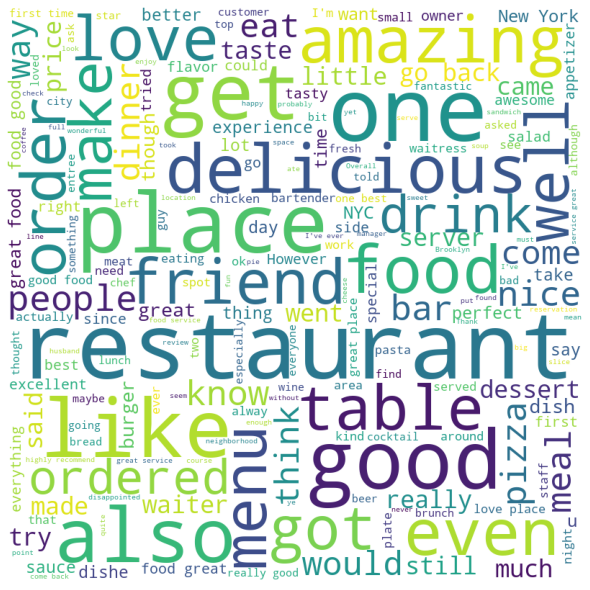

In [ ]:
#Word Cloud for fake review

wordcloud_fake = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(fake_review_df["text"])) 
  
# plot the word cloud for fake reviews data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

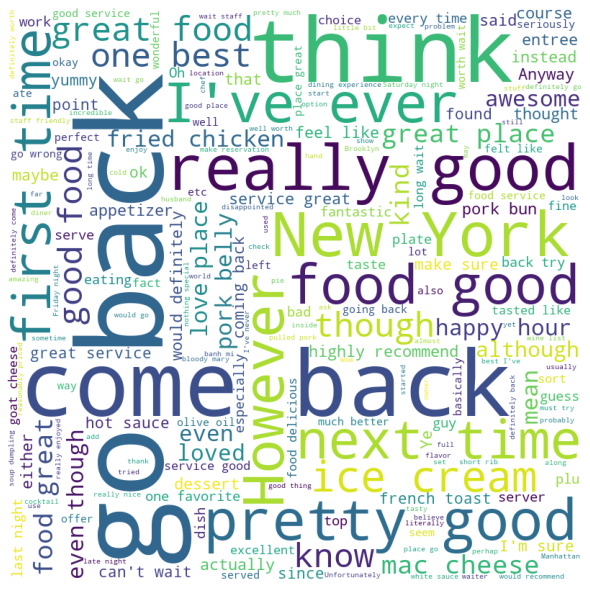

In [ ]:
# Word Cloud for real review

wordcloud_real = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(real_review_df["text"])) 
  
# plot the word cloud for real reviews data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_real) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Part3: Model Training

### Part3.1: Non contextual embedding based training approach (token count based):

1. **Naive Bayes** are mostly used in natural language processing. Naive Bayes classifier algorithm is a family of algorithms which use Bayes Theorem. It uses the naive assumption that all the features are independent of each other. Bayes theorem calculates the probability P(c|x) where c is the class of possible outcomes and x is the given instance which has to be classified.
P(c|x) = P(x|c) * P(c) / P(x)
According to our data, the class is 0 or 1, where 0 implies fake news and 1 implies true news. Given a news x, we will compute P(true news|x) as well as P(fake news|x). If P(true news|x) > P(false news|x), the algorithm predicts it is a true news. Otherwise, the news will be predicted as fake.

2. **Support Vector Machine or SVM** is a linear model for classification and regression problems. SVM model takes the data in the training set, and maps it to data points in space so that there is a clear gap between points belonging to different categories. This gap is made as wide as possible to improve the performance of the model. Whenever a new data point is given to the model, it maps the point to the same space, and predict the category based on the side of the gap on which they fall.

3. **Passive aggressive classifier** is an online algorithm that learns from massive streams of data. The idea is to get an example, update the classifier, and throw away the example. It is fast and easy to implement, but does not provide global guarantees like SVM.
Now we can apply these models to our data. But, we cannot give the text directly as an input to the classifier. Instead, we will convert the text to numbers. Machine learning uses a simple model called bag-of-words to deal with text data. The idea is to find all the unique words in the document, and create a vector of size equal to the number of unique words. Each word is assigned an index in the vector. The index corresponding to the word is filled with the frequency of that word in the document. The main drawback with this approach is that it ignores all the information related to the order of the words, and only takes into account the frequency of the words. We are using CountVectorizer and TfidfTransformer for the transformation.

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

Mounted at /content/drive


In [ ]:
#splitting data for training and testing
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(combined_data['text'],combined_data['review_label'],test_size=0.2, random_state = 1)

F1 score:   94.480
Accuracy score:   0.895


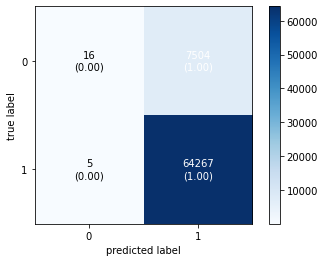

In [ ]:
#Multinomial Naive Bayes
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.f1_score(y_test, prediction)
print("F1 score:   %0.3f" % (score*100))
print("Accuracy score:   %0.3f" % (metrics.accuracy_score(y_test, prediction)))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Accuracy score:   0.895
F1 score:   94.428


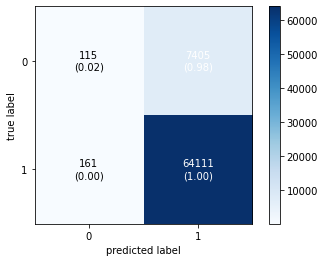

In [ ]:
#Support Vector Machine
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.f1_score(y_test, prediction)
print("Accuracy score:   %0.3f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Accuracy score:   0.863
F1 score:   92.556


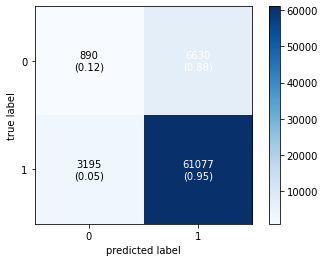

In [ ]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.f1_score(y_test, prediction)
print("Accuracy score:   %0.3f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Part3.2: Contextual embedding based training approach - T5.

In [1]:
!pip install pytorch_lightning==0.7.6

     |████████████████████████████████| 256kB 14.3MB/s 
     |████████████████████████████████| 829kB 21.4MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=2247ac09c3395c2535ec15e85ce0f9b237f838a7247d26ba161a37bff633b3cc
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [2]:
!pip install wandb

     |████████████████████████████████| 1.8MB 13.6MB/s 
     |████████████████████████████████| 133kB 54.2MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 174kB 46.0MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=1c4006d7fd206f1c98abdbe94d819c7a420ce4935b72feb71c53bc9f9ce10e35
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=342a8e68f0d3b2ba021ed7f0a5b73e2276c2cb1c8536db8c3901f029c248a21b
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [3]:
!pip install transformers==4.6.0

     |████████████████████████████████| 2.3MB 13.3MB/s 
     |████████████████████████████████| 3.3MB 50.0MB/s 
     |████████████████████████████████| 901kB 40.4MB/s 


In [4]:
!pip install nlp

     |████████████████████████████████| 1.7MB 13.6MB/s 
     |████████████████████████████████| 245kB 43.9MB/s 


In [5]:
!pip install SentencePiece

     |████████████████████████████████| 1.2MB 14.1MB/s 


In [6]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
# Using T5 model #9b682144b97dd618fd731b55f8b6d7ecfac21c39
from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation

os.environ["WANDB_API_KEY"] = "9b682144b97dd618fd731b55f8b6d7ecfac21c39"
wandb_logger = WandbLogger(project='fakenews-t5base')

In [8]:
model_name = "t5-base"
token_len = 512
model_prefix = f"{model_name}-{token_len}"

In [9]:
import argparse
import glob
import os
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import string
import pandas as pd
# pd.set_option('display.max_colwidth', -1)
import numpy as np
import torch
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import WandbLogger
from nlp import load_metric

from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)
import random
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

Mounted at /content/drive


In [11]:
# No nan in our dataset
combined_data.isna().sum()

usr_id          0
prod_id         0
prod_rating     0
review_label    0
rating_date     0
usr_name        0
prod_name       0
text            0
dtype: int64

In [12]:
import numpy as np
import pandas as pd
import sentencepiece

df = combined_data.copy()

class ReviewsData(Dataset):
    def __init__(self, df, tokenizer, type_path, num_samples, input_length=4096, output_length=4096, print_text=False):         
        ## Shuffle data set
        df = df.sample(frac=1, random_state=1)
        self.dataset = []
        val_size = int(0.2 * df.shape[0])

        inps = df["text"].values.tolist()
        lbls = df["review_label"].values.tolist()

        for i, inp in enumerate(inps):
            inp = inp.replace(":", "")
            inp = "classify: " + inp
            lbl = str(lbls[i])
            self.dataset.append({"inp": inp, "lbl": lbl})
        
        if type_path == "train":
            self.dataset = self.dataset[:len(self.dataset) - val_size]
        elif type_path == "validation":
            self.dataset = self.dataset[len(self.dataset) - val_size:]

        if num_samples:
            self.dataset = self.dataset[:num_samples]
        
        # print(len(self.dataset))

        self.input_length = input_length
        self.tokenizer = tokenizer
        self.output_length = output_length
        self.print_text = print_text
        
  
    def __len__(self):
        return len(self.dataset)

    def convert_to_features(self, example_batch):
        
        input_ = example_batch['inp']
        target_ = example_batch['lbl']
        
        input_ = input_.strip()

        
        source = self.tokenizer.batch_encode_plus([input_], max_length=self.input_length, 
                                                     padding='max_length', truncation=True, return_tensors="pt")
        
        targets = self.tokenizer.batch_encode_plus([target_], max_length=3, 
                                                     padding='max_length', truncation=True, return_tensors="pt")

        return source, targets
  
    def __getitem__(self, index):
        source, targets = self.convert_to_features(self.dataset[index])
        
        
        if self.print_text:
            print("Lens are: ", source['input_ids'][0].shape, targets['input_ids'][0].shape)
        
        source_ids = source["input_ids"].squeeze()
        target_ids = targets["input_ids"].squeeze()

        # return {"source_ids": source_ids, "target_ids": target_ids}

        src_mask    = source["attention_mask"].squeeze()
        target_mask = targets["attention_mask"].squeeze()

        return {"source_ids": source_ids, "source_mask": src_mask, "target_ids": target_ids, "target_mask": target_mask}



def get_dataset(tokenizer, type_path, num_samples, args, df=df):
      return ReviewsData(df = df, tokenizer=tokenizer, type_path=type_path, num_samples=num_samples, input_length=args.max_input_length, 
                        output_length=args.max_output_length)

In [13]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
dataset = ReviewsData(combined_data, tokenizer, 'validation', None, token_len, 512, True)
len(dataset)

71791

In [14]:
data = dataset[5]
print()
print("Shape of Tokenized Text: ", data['source_ids'].shape)
print()
print("Sanity check - Decode Text: ", tokenizer.decode(data['source_ids']))
print("====================================")
print("Sanity check - Decode Classification: ", tokenizer.decode(data['target_ids']))

Lens are:  torch.Size([512]) torch.Size([3])

Shape of Tokenized Text:  torch.Size([512])

Sanity check - Decode Text:  classify: we went for the tail end of the brunch...around 230 PM on a saturday. other than being semi-rushed out so they could prepare for the dinner rush (which i get---i was a waitress back in the day), the meal was perfect. the french ( i think) waiter we had was perfect. not snobby at all, which i keep reading here. the black label burgers were insane. and the check was worth every single dime paid. all the hype in these reviews are silly. the burger is the best in town. just face it and GO!</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

In [15]:
def exact_match_score(prediction, ground_truth):
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

In [16]:
def calculate_scores(predictions, ground_truths):
    em_score = 0
    subset_match_score = 0
    
    for i in range(len(predictions)):
        ground_truth = ground_truths[i]
        prediction = predictions[i]
        em_score +=  exact_match_score(prediction, ground_truth)
    
    em_score /= len(predictions)
    return em_score*100

In [17]:
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix((remove_punc(lower(s))))

In [18]:
class T5FakeReviewDetector(pl.LightningModule):
  def __init__(self, hparams):
      super(T5FakeReviewDetector, self).__init__()
      self.hparams = hparams        
      self.model = T5ForConditionalGeneration.from_pretrained(hparams.model_name_or_path, return_dict=True)
      self.tokenizer = T5Tokenizer.from_pretrained(hparams.tokenizer_name_or_path, max_length=hparams.max_input_length)
      self.output_dir = Path(self.hparams.output_dir)
      self.step_count = 0
      
      if self.hparams.freeze_embeds:
          self.freeze_embeds()
      if self.hparams.freeze_encoder:
          self.freeze_params(self.model.get_encoder())
          assert_all_frozen(self.model.get_encoder())
          
          
      n_observations_per_split = {
          "train": self.hparams.n_train,
          "validation": self.hparams.n_val,
          "test": self.hparams.n_test,
      }
      self.n_obs = {k: v if v >= 0 else None for k, v in n_observations_per_split.items()}
      self.em_score_list = []

  def freeze_params(self, model):
      for par in model.parameters():
          par.requires_grad = False
          
  def freeze_embeds(self):
      try:
          self.freeze_params(self.model.model.shared)
          for d in [self.model.model.encoder, self.model.model.decoder]:
              freeze_params(d.embed_positions)
              freeze_params(d.embed_tokens)
      except AttributeError:
          self.freeze_params(self.model.shared)
          for d in [self.model.encoder, self.model.decoder]:
              self.freeze_params(d.embed_tokens)

  def lmap(self, f, x):
      return list(map(f, x))

  def is_logger(self):
      return self.trainer.proc_rank <= 0
  
  def parse_score(self, result):
      return {k: round(v.mid.fmeasure * 100, 4) for k, v in result.items()}
      
  def forward(self, input_ids, attention_mask=None, decoder_input_ids=None, decoder_attention_mask=None, lm_labels=None):
      return self.model(
              input_ids,
              attention_mask=attention_mask,
              decoder_input_ids=decoder_input_ids,
              decoder_attention_mask=decoder_attention_mask,
              labels=lm_labels
          )

  def _step(self, batch):
      labels = batch["target_ids"]
      labels[labels[:, :] == self.tokenizer.pad_token_id] = -100

      outputs = self(
          input_ids=batch["source_ids"],
          attention_mask=batch["source_mask"],
          lm_labels=labels,
          decoder_attention_mask=batch['target_mask']
      )

      loss = outputs[0]

      return loss
  
  def ids_to_clean_text(self, generated_ids):
      gen_text = self.tokenizer.batch_decode(
          generated_ids,
          skip_special_tokens=True, 
          clean_up_tokenization_spaces=True
      )
      return self.lmap(str.strip, gen_text)
  
  def _generative_step(self, batch) :
      
      t0 = time.time()
      # print(batch)
      inp_ids = batch["source_ids"]
      
      generated_ids = self.model.generate(
          batch["source_ids"],
          attention_mask=batch["source_mask"],
          use_cache=True,
          decoder_attention_mask=batch['target_mask'],
          max_length=3

      )
      preds = self.ids_to_clean_text(generated_ids)
      target = self.ids_to_clean_text(batch["target_ids"])
#         print("Preds and Targets: ", preds, target)
          
      gen_time = (time.time() - t0) / batch["source_ids"].shape[0]  
  
      loss = self._step(batch)
      base_metrics = {'val_loss': loss}
      summ_len = np.mean(self.lmap(len, generated_ids))
      base_metrics.update(gen_time=gen_time, gen_len=summ_len, preds=preds, target=target)
      em_score  = calculate_scores(preds, target)
      
      self.em_score_list.append(em_score)
      
      em_score = torch.tensor(em_score,dtype=torch.float32)
  
      base_metrics.update(accuracy=em_score)
      
      return base_metrics

  def training_step(self, batch, batch_idx):
      loss = self._step(batch)

      tensorboard_logs = {"train_loss": loss}
      return {"loss": loss, "log": tensorboard_logs}

  def training_epoch_end(self, outputs):
      avg_train_loss = torch.stack([x["loss"] for x in outputs]).mean()
      tensorboard_logs = {"avg_train_loss": avg_train_loss}
      return {"avg_train_loss": avg_train_loss, "log": tensorboard_logs, 'progress_bar': tensorboard_logs}

  def validation_step(self, batch, batch_idx):
      return self._generative_step(batch)
  
  def validation_epoch_end(self, outputs):
      
      avg_loss = torch.stack([x["val_loss"] for x in outputs]).mean()
      tensorboard_logs = {"val_loss": avg_loss}
      
      if len(self.em_score_list) <= 2:
          average_em_score = sum(self.em_score_list) / len(self.em_score_list) 
          
      else:
          latest_em_score = self.em_score_list[:-2]
          average_em_score = sum(latest_em_score) / len(latest_em_score) 
      
      average_em_score = torch.tensor(average_em_score,dtype=torch.float32)
      tensorboard_logs.update(accuracy=average_em_score)
      
      self.target_gen= []
      self.prediction_gen=[]
      return {"avg_val_loss": avg_loss, 
              "accuracy" : average_em_score,
              "log": tensorboard_logs, 'progress_bar': tensorboard_logs}

  def configure_optimizers(self):

      model = self.model
      no_decay = ["bias", "LayerNorm.weight"]
      optimizer_grouped_parameters = [
          {
              "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
              "weight_decay": self.hparams.weight_decay,
          },
          {
              "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
              "weight_decay": 0.0,
          },
      ]
      optimizer = AdamW(optimizer_grouped_parameters, lr=self.hparams.learning_rate, eps=self.hparams.adam_epsilon)
      self.opt = optimizer
      return [optimizer]

  def optimizer_step(self, epoch, batch_idx, optimizer, optimizer_idx, second_order_closure=None, using_native_amp=None):
      if self.trainer.use_tpu:
          xm.optimizer_step(optimizer)
      else:
          optimizer.step()
      optimizer.zero_grad()
      self.lr_scheduler.step()

  def get_tqdm_dict(self):
      tqdm_dict = {"loss": "{:.3f}".format(self.trainer.avg_loss), "lr": self.lr_scheduler.get_last_lr()[-1]}

      return tqdm_dict
  
  def train_dataloader(self):   
      n_samples = self.n_obs['train']
      train_dataset = get_dataset(tokenizer=self.tokenizer, type_path="train", num_samples=n_samples, args=self.hparams)
      dataloader = DataLoader(train_dataset, batch_size=self.hparams.train_batch_size, drop_last=True, shuffle=True, num_workers=4)
      t_total = (
          (len(dataloader.dataset) // (self.hparams.train_batch_size * max(1, self.hparams.n_gpu)))
          // self.hparams.gradient_accumulation_steps
          * float(self.hparams.num_train_epochs)
      )
      scheduler = get_linear_schedule_with_warmup(
          self.opt, num_warmup_steps=self.hparams.warmup_steps, num_training_steps=t_total
      )
      self.lr_scheduler = scheduler

      return dataloader

  def val_dataloader(self):
      n_samples = self.n_obs['validation']
      validation_dataset = get_dataset(tokenizer=self.tokenizer, type_path="validation", num_samples=n_samples, args=self.hparams)
      
      return DataLoader(validation_dataset, batch_size=self.hparams.eval_batch_size, num_workers=4)
  
  # def test_dataloader(self):
  #     n_samples = self.n_obs['test']
  #     test_dataset = get_dataset(tokenizer=self.tokenizer, type_path="test", num_samples=n_samples, args=self.hparams)
      
  #     return DataLoader(test_dataset, batch_size=self.hparams.eval_batch_size, num_workers=4)
  
  def on_save_checkpoint(self, checkpoint):
      save_path = self.output_dir.joinpath(model_prefix)
      self.model.config.save_step = self.step_count
      self.model.save_pretrained(save_path)
      self.tokenizer.save_pretrained(save_path)

In [19]:
logger = logging.getLogger(__name__)

class LoggingCallback(pl.Callback):
  def on_validation_end(self, trainer, pl_module):
    logger.info("***** Validation results *****")
    if pl_module.is_logger():
      metrics = trainer.callback_metrics
      # Log results
      for key in sorted(metrics):
        if key not in ["log", "progress_bar"]:
          logger.info("{} = {}\n".format(key, str(metrics[key])))

  def on_test_end(self, trainer, pl_module):
    logger.info("***** Test results *****")

    if pl_module.is_logger():
      metrics = trainer.callback_metrics

      # Log and save results to file
      output_test_results_file = os.path.join(pl_module.hparams.output_dir, "test_results.txt")
      with open(output_test_results_file, "w") as writer:
        for key in sorted(metrics):
          if key not in ["log", "progress_bar"]:
            logger.info("{} = {}\n".format(key, str(metrics[key])))
            writer.write("{} = {}\n".format(key, str(metrics[key])))

In [20]:
args_dict = dict(
    output_dir="", # path to save the checkpoints
    model_name_or_path= model_name,
    tokenizer_name_or_path= model_name,
    max_input_length=token_len,
    max_output_length=token_len,
    freeze_encoder=False,
    freeze_embeds=False,
    learning_rate=3e-4,
    weight_decay=0.0,
    adam_epsilon=1e-8,
    warmup_steps=0,
    train_batch_size=1,
    eval_batch_size=1,
    num_train_epochs=10,
    gradient_accumulation_steps=8,
    n_gpu=1,
    resume_from_checkpoint=None, 
    val_check_interval = 0.5, 
    n_val=-1,
    n_train=-1,
    n_test=-1,
    early_stop_callback=False,
    fp_16=False, # if you want to enable 16-bit training then install apex and set this to true
    opt_level='O1', # you can find out more on optimisation levels here https://nvidia.github.io/apex/amp.html#opt-levels-and-properties
    max_grad_norm=1.0, # if you enable 16-bit training then set this to a sensible value, 0.5 is a good default
    seed=42,
)


args_dict.update({'output_dir': "/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/" + model_prefix + "_epoch3", 'num_train_epochs':3,
             'train_batch_size': 8, 'eval_batch_size': 8})
args = argparse.Namespace(**args_dict)


## Define Checkpoint function
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    filepath="./" + model_prefix + "checkpoint", prefix = model_prefix,monitor="val_loss", mode="min", save_top_k=5
)

In [21]:
## If resuming from checkpoint, add an arg resume_from_checkpoint
train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level=args.opt_level,
    resume_from_checkpoint=args.resume_from_checkpoint,
    gradient_clip_val=args.max_grad_norm,
    checkpoint_callback=checkpoint_callback,
    val_check_interval=args.val_check_interval,
    logger=wandb_logger,
    callbacks=[LoggingCallback()],
    # progress_bar_refresh_rate=0
)

model = T5FakeReviewDetector(args)
trainer = pl.Trainer(**train_params)

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]


In [ ]:
trainer.fit(model)

wandb: Currently logged in as: zjc664656505 (use `wandb login --relogin` to force relogin)



    | Name                                                                | Type                       | Params
---------------------------------------------------------------------------------------------------------------
0   | model                                                               | T5ForConditionalGeneration | 222 M 
1   | model.shared                                                        | Embedding                  | 24 M  
2   | model.encoder                                                       | T5Stack                    | 109 M 
3   | model.encoder.block                                                 | ModuleList                 | 84 M  
4   | model.encoder.block.0                                               | T5Block                    | 7 M   
5   | model.encoder.block.0.layer                                         | ModuleList                 | 7 M   
6   | model.encoder.block.0.layer.0                                       | T5LayerSelfAttention       

In [ ]:
import textwrap
from tqdm.auto import tqdm
import torch

torch.cuda.empty_cache()
torch.cuda.memory_summary()

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |     850 MB |    5993 MB |   90295 MB |   89445 MB |\n|       from large pool |     850 MB |    5991 MB |   90267 MB |   89417 MB |\n|       from small pool |       0 MB |       2 MB |      27 MB |      27 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |     850 MB |    5993 MB |   90295 MB |   89445 MB |\n|       from large pool |     850 MB |    5991 MB |

In [ ]:
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/t5-base-512_epoch1/t5-base-512/")

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
dataset = dataset = ReviewsData(df, tokenizer, 'validation', None, 128, 3, True)

In [ ]:
def pad_removal(txt_list):
  pads = ["<", " "]
  out = []
  for txt in txt_list:
    for i in pads:
      out.append(txt.replace(i, ""))
  return outs

In [ ]:
#validation eval step
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

validation_batch_size = 500

validation_loader = DataLoader(dataset, batch_size=validation_batch_size, shuffle=True)
vali_it = iter(validation_loader)
vali_batch = next(vali_it)
model.to('cuda')
outs = model.generate(
            vali_batch["source_ids"].cuda(),
            attention_mask=vali_batch["source_mask"].cuda(),
            use_cache=True,
            decoder_attention_mask=vali_batch['target_mask'].cuda(),
        )



Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are: 

In [ ]:
vali_prediction = [int(i) for i in [tokenizer.batch_decode(ids, skip_special_tokens= True)[1] if tokenizer.batch_decode(ids, skip_special_tokens= True)[1] != "" else tokenizer.batch_decode(ids, skip_special_tokens= True)[2]for ids in outs]]
vali_targets = [int(i) for i in [tokenizer.batch_decode(ids, skip_special_tokens= True)[0] if tokenizer.batch_decode(ids, skip_special_tokens= True)[0] != "" else tokenizer.batch_decode(ids, skip_special_tokens= True)[1] for ids in vali_batch['target_ids']] ]

In [ ]:
!pip install rouge

In [ ]:
# Evaluation result of T-5
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(vali_targets, vali_prediction)
print("F1 score:   %0.3f" % (score*100))
print("Accuracy score:   %0.3f" % (metrics.accuracy_score(vali_targets, vali_prediction)))

F1 score:   93.955
Accuracy score:   0.886


In [ ]:
#example output generation step
loader = DataLoader(dataset, batch_size=32, shuffle=True)
it = iter(loader)
batch = next(it)
batch["source_ids"].shape

Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are: 

torch.Size([32, 128])

In [ ]:
model.to('cuda')
outs = model.generate(
            batch["source_ids"].cuda(),
            attention_mask=batch["source_mask"].cuda(),
            use_cache=True,
            decoder_attention_mask=batch['target_mask'].cuda(),
        )

prediction = [tokenizer.batch_decode(ids, skip_special_tokens= True) for ids in outs]

texts = [tokenizer.decode(ids) for ids in batch['source_ids']]
targets = [tokenizer.batch_decode(ids, skip_special_tokens= True) for ids in batch['target_ids']]

In [ ]:
# some prediction examples: 32 samples from the validation dataset.

for i in range(32):
    lines = textwrap.wrap("Input Text:\n%s\n" % texts[i], width=100)
    print("\n".join(lines))
    print("\nActual Class: %s" % targets[i][0])
    print("\nPredicted Class from T5: %s" % prediction[i][1])
    print("=====================================================================\n")

Input Text: classify: I love the interior of this restaurant. It's a very large and beautiful space.
I'm not sure the food is worth the long wait though. Their pork buns are great, but their ramen is
just okay. If you don't mind waiting, I'd suggest you go uptown and wait in line for Totto
Ramen.</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<pad> <pad>

Actual Class: 1

Predicted Class from T5: 1

Input Text: classify: Pleasantly surprised. They are a very diverse and tasty menu. I have not been
disappointed yet. I have tried the Falafel, Chick Pea Salad, Garlic Rice and the Spinach and
Mushroom small plate. All great. I thought moving to Keniston was going to be a bummer but I was
happy when I found this. I will be trying more things out the menu!<

### Part3.3: Contextual embedding based training approach - GPT2.